# Econometric Data Science ( HS 421 )
### *Instructor* : Dr. Sunil Paul

## End Semester assessment: **Question 3**

### Authors ( Group 12 )
- Sanjay Marreddi
- Rishabh Tripathi
- Nishant Kumar
- Yash Narnaware


### **Design a Monte Carlo experiment to study the consequences of omitting a relevant variable that is correlated with the included variable and discuss.**




- First, Let us try to understand the consequences of omitting a relevant variable that is correlated with the included variable in a general case.

- If we assume the correct model is given by $y_i=\beta_0+\beta _{1}x_{1i}+\beta _{2}x_{2i}+\varepsilon_1$ but we estimated the model $y_i=\beta _{1}x_{1i}+\varepsilon_2$. Notice that we have ommited the $x_2$ variable. 




- Let the estimate of $\beta _{1}$ in the above misspecified model equal to $\widehat{\beta }_{1}$ which is equal to $%
\frac{\sum x_{1}y}{\sum x_{1}^{2}}$. Now upon substituting the true model into the expression of $\widehat{\beta }_{1}$ and solving, we get

$$E(
\widehat{\beta }_{1}) =\beta _{1}+\beta _{2}b_{21};  $$where $b_{21}=\frac{\sum x_{1}x_{2}}{\sum x_{1}^{2}}$ is the regression coefficient from a regression of $x_{2}$ on $x_{1.}$ Hence the coefficient from misspecifed model will be biased with the Bias value of (coefficient of excluded variable) $*$ ( Coefficient in a regression of the excluded variable on the included variables).

- From the definition of bias we can also infer that the $\widehat{\beta }_{1}$ will be unbiased if $\beta _{2}=0$ (if the omitted variable has no effect on Y) and $b_{21}=0$ (i.e. when $x_{2}$ and $x_{1}$are uncorrelated).

- Similarly as the error term captures the influence of **omitted variable** ( $x_2$) the variance would be incorrectly estimated as a result the variance of coefficients would also be biased.

- To conclude, **If we omit a relevant variable that is correlated with the include variable then the estimates of constant and slope coefficient are biased and inconsistent and the variance of the disturbance is incorrectly estimated.**

- Now Let us perform a **Monte Carlo experiment** to study the consequences of omitting a relevant variable that is correlated with the included variable.

In [ ]:
# Monte Carlo experiment demonstrating the consequences of omitting a relevant correlated variable 

# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt

# Defining parameters
alpha = 1
beta1 = 2
beta2 = 1

# Sample size 
n = 10000

# Number of samples
m = 1000

# Creates an mx1 2D array with all zeroes.
beta_hat = np.zeros((m,1))

true_y = []
pred_y = []

# Iterating over all the samples.
for i in range(m):

      # Generating independent variables randomly
      x1 = 2*np.random.randn(n,1)

      x2 = 0.5*x1 + np.random.randn(n,1)

      # Generating the error
      e = np.random.randn(n,1)

      # Generating the dependent variable
      y = alpha + beta1*x1 + beta2*x2 + e

      true_y.append(y)

      # Creates a nx2 2D array with all ones. 
      X = np.ones((n,2))  

      # We are updating X with only x1 values. 
      # It means we are estimating as : Y = A + B1*x1 + E
      X[:,1] = x1[:,0]

      # Computing the coefficients using B_hat = ( Inv(X'X) * X' * y ) 
      A = np.transpose(X)
      B = (np.linalg.inv(A.dot(X)))  
      C = B.dot(A)                   
      beta_hatvec = C.dot(y)

      y_hat = beta_hatvec[0] + beta_hatvec[1]*x1
      pred_y.append(y_hat)

      # Storing the Beta Values
      beta_hat[i] = beta_hatvec[1][0]



Analysing the **Monte Carlo Experiment** which is coded above :

- We have taken the true model equation in the same way as described above i.e. $y_i=\beta_0+\beta _{1}x_{1i}+\beta _{2}x_{2i}+\varepsilon_1$.
- We took the values of $x_{1i}$ = 2 * random value
and $x_{2i}$ = 0. 5 * $x_{1i}$ + random value. So we can say that $x_{1}$ and $x_{2}$  are **correlated**.

- But we estimated the model $y_i=\beta _{1}x_{1i}+\varepsilon_2$ by ommiting the $x_2$ variable which is correlated with the $x_1$ variable. 

- To estimate the coefficients, We have used the mathematical formulation of Multiple Regression as follows : 

$${\hat{\beta}_{1}=(X}^{\prime }{X)}^{-1}{X}^{\prime }{y}$$

- We ran the same experiment for 1000 (m) samples with size of each sample being 10000 (n). For each sample, we generated the random values for $x_{1}$, $x_{2}$,  $\varepsilon_1$, constructed the dependent variable equation & estimated the coefficents using above method and stored them in array.

- So now the estimated value of $\beta _{1}$ which is **beta_hat** in the above code will be **biased** that means the true value
of $\beta _{1}$ will not be equal or close to the estimated value of $\beta _{1}$.

 This can be seen with the below plot.

Text(0, 0.5, 'frequency')

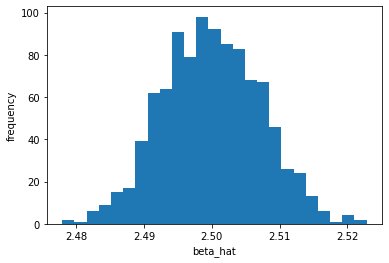

In [ ]:
# Plotting the histogram of resulting Beta Values
plt.hist(beta_hat,bins = 25)
plt.xlabel("beta_hat")
plt.ylabel("frequency")

- In the above histogram we can observe that the expected value of $\beta _{1}$ is around **2.5** and the true value of $\beta _{1}$ We
picked at the start of the model is **2**.

- Hence Expected value of $\beta _{1}$ is biased and inconsistent. Moreover the estimated value will not converge
towards the true value as the number of samples or sample size increases.

In [ ]:
# Computing the variance of distribution.
print( "Actual Variance of the distribution is", np.var(true_y) )
print( "Predicted Variance of the distribution is", np.var(pred_y) )

Actual Variance of the distribution is 27.013599977786182
Predicted Variance of the distribution is 25.013429318357655


- From the above results, It is also clear that the variance of the disturbance is **incorrectly** estimated.

- Hence we can conclude that **If we omit a relevant variable that is correlated with the include variable then the estimates of constant and slope coefficient are biased and inconsistent and the variance of the disturbance is incorrectly estimated by performing and analysing the `Monte Carlo experiment`**